# Uma breve introdução à inferência Bayesiana

<TABLE>
<tr>
    <th><img src="imgs_prez/betao-1X.jpg"  width="128" height="128" align="center"/></th>
    <th align="center">Roberto Pereira Silveira</th>
</tr>
</TABLE>

In [ ]:
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

import arviz as az
az.style.use("arviz-darkgrid")

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline  

## TOC:
* [1 - 3 Steps of Bayesian Data Analises](#3steps-BDA)
* [2 - Bayes Formula - An Intuition](#bayes-formula)
* [3 - Most Used Distributions](#distributions)
* [4 - Posterior Approximation - A glimpse into MCMC](#mcmc)
* [5 - Quick Example in PyMC3](#example)
* [6 - Sources](#sources)

In [ ]:
!ls imgs_prez/

## 1. The three steps of Bayesian data analysis<a class="anchor" id="3steps-BDA"></a>

From Andrew Gelmann in Bayesian Data Analysis (BDA - 3rd Edition) and Chris Fonnesbeck (https://github.com/fonnesbeck/bayes_tutorial_2019).

<img src="imgs_prez/bayes_123.png" align="center"/>

**Source**: https://github.com/fonnesbeck/bayes_tutorial_2019)

### Step 1: Specify a probability model

As was noted above, Bayesian statistics involves using probability models to solve problems. So, the first task is to *completely specify* the model in terms of probability distributions. This includes everything: unknown parameters, data, covariates, missing data, predictions. All must be assigned some probability density.

This step involves making choices.

- what is the form of the sampling distribution of the data?
- what form best describes our uncertainty in the unknown parameters?

**Source**: https://github.com/fonnesbeck/bayes_tutorial_2019)

### Step 2: Calculate a posterior distribution

The mathematical form \\(p(\theta | y)\\) that we associated with the Bayesian approach is referred to as a **posterior distribution**.

> posterior /pos·ter·i·or/ (pos-tēr´e-er) later in time; subsequent.

Why posterior? Because it tells us what we know about the unknown \\(\theta\\) *after* having observed \\(y\\).

This posterior distribution is formulated as a function of the probability model that was specified in Step 1. Usually, we can write it down but we cannot calculate it analytically. In fact, the difficulty inherent in calculating the posterior distribution for most models of interest is perhaps the major contributing factor for the lack of widespread adoption of Bayesian methods for data analysis. Various strategies for doing so comprise this tutorial.

**But**, once the posterior distribution is calculated, you get a lot for free:

- point estimates
- credible intervals
- quantiles
- predictions

**Source**: https://github.com/fonnesbeck/bayes_tutorial_2019)

### Step 3: Check your model

Though frequently ignored in practice, it is critical that the model and its outputs be assessed before using the outputs for inference. Models are specified based on assumptions that are largely unverifiable, so the least we can do is examine the output in detail, relative to the specified model and the data that were used to fit the model.

Specifically, we must ask:

- does the model fit data?
- are the conclusions reasonable?
- are the outputs sensitive to changes in model structure?

**Source**: https://github.com/fonnesbeck/bayes_tutorial_2019)

### The Frequentist World View

![Fisher](imgs_prez/fisher.png)

- The data that have been observed are considered **random**, because they are realizations of random processes, and hence will vary each time one goes to observe the system.
- Model parameters are considered **fixed**. The parameters' values are unknown, but they are fixed, and so we *condition* on them.

In mathematical notation, this implies a (very) general model of the following form:

<div style="font-size:35px">
\\[f(y | \theta)\\]
</div>

### The Bayesian World View

![Bayes](imgs_prez/bayes.png)

- Data are considered **fixed**. They used to be random, but once they were written into your lab notebook/spreadsheet/IPython notebook they do not change.
- Model parameters themselves may not be random, but Bayesians use probability distribtutions to describe their uncertainty in parameter values, and are therefore treated as **random**. In some cases, it is useful to consider parameters as having been sampled from probability distributions.

This implies the following form:

<div style="font-size:35px">
\\[p(\theta | y)\\]
</div>

This formulation used to be referred to as ***inverse probability***, because it infers from observations to parameters, or from effects to causes.

Bayesians do not seek new estimators for every estimation problem they encounter. There is only one estimator for Bayesian inference: **Bayes' Formula**.

 <img src="imgs_prez/img1.png" align="center"/>
 **Source**: betanalpha.github.io

 <img src="imgs_prez/img2.png" align="center"/>
 
 **Source**: betanalpha.github.io

<img src="imgs_prez/img3.png" align="center"/>

 **Source**: betanalpha.github.io

<img src="imgs_prez/img4.png" align="center"/>

 **Source**: betanalpha.github.io

<img src="imgs_prez/img5.png" align="center"/>

 **Source**: betanalpha.github.io

<img src="imgs_prez/img6.png" align="center"/>

 **Source**: betanalpha.github.io

## 2. Bayes Formula - An Intuition <a class="anchor" id="bayes-formula"></a>

From product rule we have

$$
p(\theta,  y)= p(\theta \mid y) \: p(y) 
$$

Can be also written as:
$$
p(\theta,  y)= p(y \mid \theta ) \: p(\theta)
$$

Re-ordening
$$
p(\theta \mid y) \: p(y) = p(y \mid \theta ) \: p(\theta)
$$

Finally:
$$
p(\theta \mid y)  = \frac{p(y \mid \theta ) \: p(\theta)}{p(y)}
$$

Where:
    
$p(y \mid \theta ) \rightarrow$ **Likelihood** ="plausibility"of the data given the parameters  

$p(\theta)  \rightarrow$ **Prior Distribution** = What we know about parameters withouth seen the data 

$p(y) \rightarrow $  **Marginal Likelihood or Evidence** = Normalizing constant (so that posterior probabilities sum to 1)

$(\theta \mid y) \rightarrow $  **Posterior Distribution** = compromise between prior and likelihood, updating prior believes in light of new data $\rightarrow$ suitable for **sequential** data analysis  

Writting differently ($ \theta = hypothesis $, $ y = data $):   
$$
p(hypothesis \mid data)  = \frac{p(data \mid hypothesis ) \: p(hypothesis)}{p(data)}
$$

### _"A Bayesian us one who, vagely expecting a horse, and catching a glimpse of a donkey, strongly believes he has seen a mule."_

## A quick Example
 **Source**: https://github.com/AllenDowney/BiteSizeBayes/blob/master/05_test_soln.ipynb

> In Bayesville, 1% of the population has an undiagnosed medical condition.  Jimmy gets tested for the condition and the test comes back positive; that is, the test says Jimmy has the condition.  
>
> The test is 95% accurate, which means
> * If you give the test to someone with the condition, the probability is 95% that the test will be positive, and 
> * If you give it to someone who does not have the condition, the probability is 95% that the test will be negative.  
>
> What is the probability that Jimmy actually has the condition?  

Because the test is 95% accurate, it is tempting to say that the probability is 95% that the test is correct and Jimmy has the condition.

In [ ]:
import pandas as pd

table = pd.DataFrame(index=['condition', 'no condition'])
table['prior'] = 0.01, 0.99
table

In [ ]:
table['likelihood'] = 0.95, 0.05
table

In [ ]:
table['unnorm'] = table['prior'] * table['likelihood']
table

In [ ]:
prob_data = table['unnorm'].sum()
prob_data

In [ ]:
table['posterior'] = table['unnorm'] / prob_data
table

In [ ]:
def make_bayes_table(hypos, prior, likelihood):
    """Make a Bayes table.
    
    hypos: sequence of hypotheses
    prior: prior probabilities
    likelihood: sequence of likelihoods
    
    returns: DataFrame
    """
    table = pd.DataFrame(index=hypos)
    table['prior'] = prior
    table['likelihood'] = likelihood
    table['unnorm'] = table['prior'] * table['likelihood']
    prob_data = table['unnorm'].sum()
    table['posterior'] = table['unnorm'] / prob_data
    return table

In [ ]:
## Increased Test Sensitivity to 99.5%
hypos = ['condition', 'no condition']
prior = 0.01, 0.99
likelihood = 0.995, 0.005

make_bayes_table(hypos, prior, likelihood)

In [ ]:
## Re-Test, Again Positive
hypos = ['condition', 'no condition']
prior = 0.667785, 0.332215
likelihood = 0.995, 0.005

make_bayes_table(hypos, prior, likelihood)

**Contraction** $\rightarrow$ likelihood function is more informative than, but also consistent with, the prior distribution:

 <img src="imgs_prez/img7.png" width="640" height="640" align="center"/>
 **Source**: betanalpha.github.io

**Containment** $\rightarrow$ prior distribution is more informative than, but also consistent with, the likelihood function:

 <img src="imgs_prez/img8.png" width="640" height="640" align="center"/>
 **Source**: betanalpha.github.io

**Compromise** $\rightarrow$ when there is tension between the information encoded in the likelihood function and the prior:

 <img src="imgs_prez/img9.png" width="640" height="640" align="center"/>
 **Source**: betanalpha.github.io

<img src="imgs_prez/bayesian_inference_summary.png" width="640" height="640" align="center"/>

**Source**: Osvaldo Martin - Bayesian Analysis with Python

## 3. Most Used Distributions <a class="anchor" id="distributions"></a>


3.1. **Continuous Distributions** <a class="anchor" id="continuous"></a>  
3.1.1 - Uniform  
3.1.2 - Normal (Gaussian) <a class="anchor" id="normal"></a>  
3.1.3 - T-Student (Robust Inference) <a class="anchor" id="tstudent"></a>  
3.1.4 - Beta (univariate)  <a class="anchor" id="beta"></a>  
3.1.5 - Gamma  <a class="anchor" id="gamma"></a>  

3.2. **Discrete Distributions**  
3.2.1 - Bernouli  
3.2.2 - Binomial  
3.2.3 - Poisson  
3.2.4 - Negative Binomial  

#### https://pymc3.readthedocs.io/en/latest/api/distributions/continuous.html

In [ ]:
def get_samples(dist, n_samples):
    samples = np.array([dist.random() for n in range(n_samples)])
    return samples

In [ ]:
def plot_dist_kde(dist, n_samples):
    samples = np.array([dist.random() for n in range(n_samples)])
    return None

## 3.1 Continuous Distributions <a class="anchor" id="continuous-distributions"></a>

### 3.1.1 - Uniform Distribution

$$
p(x \mid lower, upper) = \frac{1}{upper-lower}
$$

In [ ]:
x = np.linspace(-3.0, 3.0, 1000)
a, b = 0.0, 2.0
y = np.zeros(1000)
y[(x<b) & (x>a)] = 1.0/(b-a)
fig, ax = plt.subplots(figsize=(20,12))
ax.plot(x, y, label='lower=1, upper=2', linewidth=4)
a, b = -2.0, 1.0
y = np.zeros(1000)
y[(x<b) & (x>a)] = 1.0/(b-a)
ax.plot(x, y, label='lower=-2, upper=1', linewidth=4)
ax.legend(loc='upper left', frameon=True, shadow=True, fontsize = 'xx-large')
ax.set(ylim=[-0.1,0.6], xlabel='x', ylabel='p(x | lower, upper)')
plt.show()

### 3.1.2 - Normal (Gaussian) Distribution

$$
p(x \mid \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} e^{\frac{-1}{2}(\frac{x-\mu}{\sigma})^2}
$$

In [ ]:
x = np.linspace(-5.0, 5.0, 1000)
fig, ax = plt.subplots(figsize=(20,12))
f = lambda mu, sd : st.norm.pdf(x, loc=mu, scale=sd)
plot_pdf = lambda a, b : ax.plot(x, f(a,b), label=r'$\mu$={0}, $\sigma$={1}'.format(a,b), linewidth=4)
plot_pdf(0.0, 0.4)
plot_pdf(0.0, 1.0)
plot_pdf(0.0, 2.0)
plot_pdf(-2.0, 0.4)
plt.legend(loc='upper left', frameon=True, shadow=True, fontsize = 'xx-large')
ax.set(xlim=[-5,5], ylim=[-0.05,1.1], xlabel='x', ylabel='p(x | μ,σ)')
plt.show()

### 3.1.3 - T-Student (Robust)

$$
p(x \mid \nu) = \frac{\Gamma(\frac{\nu+1}{2})}{\sqrt{\nu \pi} \; \Gamma(\frac{\nu}{2})} \; (1+\frac{x^2}{\nu})^\frac{-(\nu+1)}{2}
$$

$\nu \; \rightarrow$ "normality" parameter

Where:  
$\nu=1 \; \rightarrow$  heavy tails (Cauchy)  
$\nu=\infty \; \rightarrow$  Gaussian (Normal)

In [ ]:
x = np.linspace(-5.0, 5.0, 1000)
fig, ax = plt.subplots(figsize=(20,12))
f = lambda mu, lam, df : st.t.pdf(x, df, loc=mu, scale=1.0/np.sqrt(lam))
plot_pdf = lambda mu, lam, df : ax.plot(x, f(mu, lam, df), label=r'$\nu$={2}'.format(mu, lam, df), linewidth=4)
plot_pdf(0.0, 1.0, 1.0)
plot_pdf(0.0, 1.0, 2.0)
plot_pdf(0.0, 1.0, 5)
plot_pdf(0.0, 1.0, 100)
plt.legend(loc='upper left', frameon=True, shadow=True, fontsize = 'xx-large')
ax.set(xlim=[-5,5], ylim=[0,0.4], xlabel='x', ylabel='p(x | ν)')
plt.show()

### 3.1.4 - Beta

$$
p(x \mid \alpha, \beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)+\Gamma(\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1}
$$

In [ ]:
x = np.linspace(0.0, 1.0, 1000)
fig, ax = plt.subplots(figsize=(20,12))
f = lambda a, b : st.beta.pdf(x, a, b)
plot_pdf = lambda a, b : ax.plot(x, f(a,b), label=r'$\alpha$={0}, $\beta$={1}'.format(a,b), linewidth=4)
plot_pdf(0.5, 0.5)
plot_pdf(5.0, 1.0)
plot_pdf(1.0, 3.0)
plot_pdf(1.0, 1.0)
plot_pdf(2.0, 2.0)
plot_pdf(2.0, 5.0)
plt.legend(loc='upper center', frameon=True, shadow=True, fontsize = 'xx-large')
ax.set(xlim=[0,1], ylim=[0,2.5], xlabel='x', ylabel='p(x|α,β)')
plt.show()

### 3.1.5 - Gamma

$$
p(x \mid \alpha, \beta) = \frac{\beta^{\alpha} \; x^{\alpha-1} \; e^{-\beta x} }{\Gamma{(\alpha)}}
$$

In [ ]:
x = np.linspace(0.0, 20.0, 1000)
fig, ax = plt.subplots(figsize=(20,12))
f = lambda a, b : st.gamma.pdf(x, a, scale=1.0/b)
plot_pdf = lambda a, b : ax.plot(x, f(a, b), label=r'$\alpha$={0}, $\beta$={1}'.format(a, b), linewidth=4)
plot_pdf(1.0, 0.5)
plot_pdf(2.0, 0.5)
plot_pdf(3.0, 1.0)
plot_pdf(7.5, 1.0)
plt.legend(loc='upper center', frameon=True, shadow=True, fontsize = 'xx-large')
ax.set(xlim=[0,20], ylim=[0,0.4], xlabel='x', ylabel='p(x|α,β)')
plt.show()

## 3.2 Discrete Distributions <a class="anchor" id="discrete-distributions"></a>

### 3.2.2 - Bernoulli


$$
p(x \mid p) = p^{x}(1-p)^{1-x}
$$

Where:  
$p \; \rightarrow$  Probability of success

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
f = lambda p : st.bernoulli.pmf(np.arange(st.bernoulli.ppf(0.01, p), st.bernoulli.ppf(0.99, p)), p)
plot_pmf = lambda p : ax.bar(np.arange(st.bernoulli.ppf(0.01, p), st.bernoulli.ppf(0.99, p)), f(p), width=0.2, label=r'p={0}'.format(p))
plot_pmf(0.1)
plot_pmf(0.2)
plot_pmf(0.5)
plot_pmf(0.95)
plt.legend(loc='upper left', frameon=True, shadow=True, fontsize = 'xx-large')
ax.set(xlim=[-1,1], ylim=[0,1], xlabel='x', ylabel='p(x|n,p)')
plt.show()

### 3.2.2 - Binomial


$$
p(x \mid n, p) = \binom{n}{x} \; p^{x}(1-p)^{n-x}
$$

Where:  
$n \; \rightarrow$  Number of independent events  
$p \; \rightarrow$  Probability of success

Binomial is sum of individual Bernoulli distributions

In [ ]:
n_events= 50
fig, ax = plt.subplots(figsize=(20,12))
f = lambda n, p : st.binom.pmf(np.arange(st.binom.ppf(0.01, n, p), st.binom.ppf(0.99, n, p)), n,p)
plot_pmf = lambda n, p : ax.bar(np.arange(st.binom.ppf(0.01, n, p), st.binom.ppf(0.99, n, p)), f(n, p), width=0.3, label=r'n={0}, p={1}'.format(n, p))
plot_pmf(n_events,0.1)
plot_pmf(n_events,0.2)
plot_pmf(n_events,0.5)
plot_pmf(n_events,0.95)
plt.legend(loc='upper center', frameon=True, shadow=True, fontsize = 'xx-large')
ax.set(xlim=[-1,n_events], ylim=[0,0.3], xlabel='x', ylabel='p(x|n,p)')
plt.show()

### 3.1.3 - Poisson Distribution

$$
p(x \mid \mu) = \frac{e^{-\mu} \; \mu^{x}}{x!}
$$

Where:  
$\mu \; \rightarrow$  Expected number of occurrences during the given interval ($\mu$ >= 0)

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
f = lambda mu : st.poisson.pmf(np.arange(st.poisson.ppf(0.01, mu), st.poisson.ppf(0.99, mu)), mu)
plot_pmf = lambda mu : ax.bar(np.arange(st.poisson.ppf(0.01, mu), st.poisson.ppf(0.99, mu)), f(mu), width=0.3, label=r'μ={0}'.format(mu))
plot_pmf(0.5)
plot_pmf(1)
plot_pmf(2)
plot_pmf(10)
plt.legend(loc='upper center', frameon=True, shadow=True, fontsize = 'xx-large')
ax.set(xlim=[-1,20], ylim=[0,0.7], xlabel='x', ylabel='p(x| μ)')
plt.show()

### 3.1.4 - Negative Binomial

$$
p(x \mid n, p) = \binom{x+n-1}{n-1} \; p^{n}(1-p)^{x}
$$

Where:  
$n \; \rightarrow$  Number of independent events  
$p \; \rightarrow$  Probability of success

In [ ]:
n_events= 10
fig, ax = plt.subplots(figsize=(20,12))
f = lambda n, p : st.nbinom.pmf(np.arange(st.nbinom.ppf(0.01, n, p), st.nbinom.ppf(0.99, n, p)), n,p)
plot_pmf = lambda n, p : ax.bar(np.arange(st.nbinom.ppf(0.01, n, p), st.nbinom.ppf(0.99, n, p)), f(n, p), width=0.3, label=r'n={0}, p={1}'.format(n, p))
plot_pmf(n_events,0.5)
plot_pmf(n_events,0.8)
plot_pmf(n_events,0.95)
plt.legend(loc='upper center', frameon=True, shadow=True, fontsize = 'xx-large')
ax.set(xlim=[-1,30], ylim=[0,0.7], xlabel='x', ylabel='p(x|n,p)')
plt.show()

## 4. Posterior Approximation - A glimpse into MCMC <a class="anchor" id="mcmc"></a>

- While convalescing from an illness in 1946, Stan Ulam was playing solitaire. It, then, occurred to him to try to compute the chances that a particular solitaire laid out with 52 cards would come out successfully (Eckhard, 1987). After attempting exhaustive combinatorial calculations, he decided to go for the more practical approach of laying out several solitaires at random and then observing and counting the number of successful plays. This idea of selecting a statistical sample to approximate a hard combinatorial problem by a much simpler problem is at the heart of modern Monte Carlo simulation.
- MCMC algorithms typically require the design of proposal mechanisms to generate candidate hypotheses
- MCMC techniques are often applied to solve integration and optimisation problems in large dimensional spaces.

## MCMC Heroes
<TABLE border="1">
<tr>
    <th align="center">Stan Ulam</th>
    <th align="center">John von Neumann</th>
    <th align="center">Enrico Fermi</th>
</tr>
<tr>
    <th><img src="imgs_prez/Stanislaw_Ulam.tif.jpg" width="360" height="180" align="center"/></th>
    <th><img src="imgs_prez/440px-JohnvonNeumann-LosAlamos.gif" width="360" height="180" align="center"/></th>
    <th><img src="imgs_prez/440px-Enrico_Fermi_1943-49.jpg" width="360" height="180" align="center"/></th>
</tr>
</TABLE>

 **Source**: An Introduction to MCMC for Machine Learning

## Rejection Sampling

Draw samples from a complicated distribution $P(x)$ where sampling directly is hard.  

Use a proposal distribution $Q(x)$ that is easier to sample from, where $Q(x)$ needs to envelope $P(x)$ ( $k \: Q(x) \: > \: P(x)$) for all x.

**P(x)** $\rightarrow $ Initial Distribution  
**Q(x)** $\rightarrow $ Proposal Distribution 

In [ ]:
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

proposal_loc = 50
proposal_scale = 30
sns.set()
def p(x):
    return st.norm.pdf(x, loc=30, scale=10) \
           + st.norm.pdf(x, loc=80, scale=20) \
          # + st.norm.pdf(x, loc=150, scale=10)
def q(x):
    return st.norm.pdf(x, loc=proposal_loc, scale=proposal_scale)

In [ ]:
def rejection_sampling(iter=1000):
    samples = []

    for i in range(iter):
        z = np.random.normal(proposal_loc, proposal_scale)
        u = np.random.uniform(0, k*q(z))

        if u <= p(z):
            samples.append(z)

    return np.array(samples)

In [ ]:
p_init = -50
p_end = 200
x = np.arange(p_init, p_end)
k = max(p(x) / q(x))

In [ ]:
plt.rcParams["figure.figsize"] = (15,8)
plt.plot(x, p(x))
plt.plot(x, k*q(x),'g')
plt.show()

In [ ]:
s = rejection_sampling(iter=100000)
sns.distplot(s)

## Drawbacks
- Needs to have a good fit between $Q(x)$ and $P(x)$ 
- May be hard to choose $Q(x)$ for complex distributions  
- Lot's of time wasted in rejecting points out of $P(x)$

### The Monte Carlo principle

$$
p_{N}(x)=\frac{1}{N}\sum_{i=1}^{N} \delta_{x}^{(i)}(x)
$$

Approximate integrals (or very large sums) $I(f)$ with tractable sums $I_{N}(f)$


$$
I_{N}(f)=\frac{1}{N}\sum_{i=1}^{N} f(x^{(i)}) \xrightarrow[\inf]{\text{a.s.}}I(f) = \int_{x} f(x)p(x)d(x)
$$

- Main idea: 
    - generating samples $x_{i}$ while exploring the state space _**X**_ using a
Markov chain mechanism $\rightarrow$ spend more time in most important (high probable) regions

### Metropolis-Hastings

For each parameter _**p**_, do the following.  
Initialize an arbitrary point for the parameter (this is $p_{t}$, or _p_ at step _t_).  
Define a probability density **P($p_{t}$)**, for which we will draw new values of the parameters. Here, we will use **$P(p)=\mathcal{N}(p_{t-1},1)$**.
For each iteration:
1. Generate candidate new candidate $p_{t}$ drawn from **P($p_{t}$)**.
2. Calculate the likelihood of the data under the previous parameter value(s) **$p_{t-1}$: L($p_{t-1}$)**
3. Calculate the likelihood of the data under the proposed parameter value(s) **$p_{t}$: L($p_{t}$)**
4. Calculate acceptance ratio **$r=\frac{L(p_{t})}{L(p_{t-1})}$**.
5. Generate a new random number on the unit interval: **$s \sim U(0,1)$**.
6. Compare s to r.
 - If s≤r, accept **$p_{t}$**.
 - If s>r, reject **$p_{t}$** and continue sampling again with **$p_{t-1}$**

**Source**: Eric Ma - An Introduction to Probability and Computational Bayesian Statistics

```python
# Metropolis-Hastings Sampling
mu_prev = np.random.normal()
sigma_prev = np.random.normal()

# Keep a history of the parameter values and ratio.
mu_history = dict()
sigma_history = dict()
ratio_history = dict()

for i in range(1000):
    mu_history[i] = mu_prev
    sigma_history[i] = sigma_prev
    mu_t = np.random.normal(mu_prev, 0.1)
    sigma_t = np.random.normal(sigma_prev, 0.1)

    # Compute joint log likelihood
    LL_t = model_log_prob(mu_t, sigma_t, y)
    LL_prev = model_log_prob(mu_prev, sigma_prev, y)

    # Calculate the difference in log-likelihoods
    # (or a.k.a. ratio of likelihoods)
    diff_log_like = LL_t - LL_prev
    if diff_log_like > 0:
        ratio = 1
    else:
        # We need to exponentiate to get the correct ratio,
        # since all of our calculations were in log-space
        ratio = np.exp(diff_log_like)

    # Defensive programming check
    if np.isinf(ratio) or np.isnan(ratio):
        raise ValueError(f"LL_t: {LL_t}, LL_prev: {LL_prev}")

    # Ratio comparison step
    ratio_history[i] = ratio
    p = np.random.uniform(0, 1)

    if ratio >= p:
        mu_prev = mu_t
        sigma_prev = sigma_t
```

### Hamiltonian Monte Carlo

 **Source**: Michael Betancourt - A Conceptual Introduction to Hamiltonian Monte Carlo

<img src="imgs_prez/hamiltonian_1.png" width="480" height="480" align="center"/>

**Source**: Michael Betancourt - A Conceptual Introduction to Hamiltonian Monte Carlo

<img src="imgs_prez/hamiltonian_2.png" width="480" height="480" align="center"/>

**Source**: Michael Betancourt - A Conceptual Introduction to Hamiltonian Monte Carlo

<img src="imgs_prez/hamiltonian_3.png" width="480" height="480" align="center"/>

**Source**: Michael Betancourt - A Conceptual Introduction to Hamiltonian Monte Carlo

<img src="imgs_prez/hamiltonian_4.png" width="480" height="480" align="center"/>

**Source**: Michael Betancourt - A Conceptual Introduction to Hamiltonian Monte Carlo

## Demo - Metropolis- Hastings

[Chi Feng - MCMC Galery](https://chi-feng.github.io/mcmc-demo/app.html)

## 5. Quick Example in PyMC3  <a class="anchor" id="example"></a>

**Source**: Osvaldo Martin - Bayesian Analysis with Python

https://alexioannides.com/2018/11/07/bayesian-regression-in-pymc3-using-mcmc-variational-inference/#comparing-predictions

Text(0.5, 1.0, 'PDF')

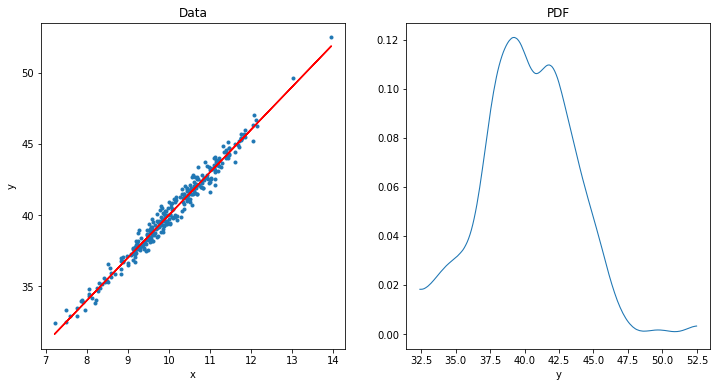

In [29]:
import pymc3 as pm
import numpy as np
import pandas as pd
from theano import shared
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
import warnings
warnings.filterwarnings("ignore")

np.random.seed(1)
N = 300
alpha_real = 10
beta_real = 3
eps_real = np.random.normal(0, 0.5, size=N)

x = np.random.normal(10, 1, N)
y_real = alpha_real + beta_real * x
y = y_real + eps_real

_, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(x, y, 'C0.')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].plot(x, y_real, 'r')
az.plot_kde(y, ax=ax[1], textsize = 10)
ax[1].set_xlabel('y')
ax[0].set_title("Data")
ax[1].set_title("PDF")

In [30]:
with pm.Model() as model_g:
    ## Priors
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1)
    #ϵ = pm.HalfCauchy('ϵ', 5)
    ϵ = pm.Normal('ϵ', 10)
    
    x_shared = shared(x.astype('float64'))
    y_shared = shared(y.astype('float64'))

    ## Linear Regression
    μ = pm.Deterministic('μ', α + β * x_shared)
    
    ## Likelihood
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y_shared)

    trace_g = pm.sample(2000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, β, α]
100%|██████████| 2500/2500 [00:14<00:00, 173.61it/s]
The acceptance probability does not match the target. It is 0.8885409879160978, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9145212717450725, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9042177169739173, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9150899057536254, but should be close to 0.8. Try to increase the number of tuning steps.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128f226a0>,
      dtype=object)

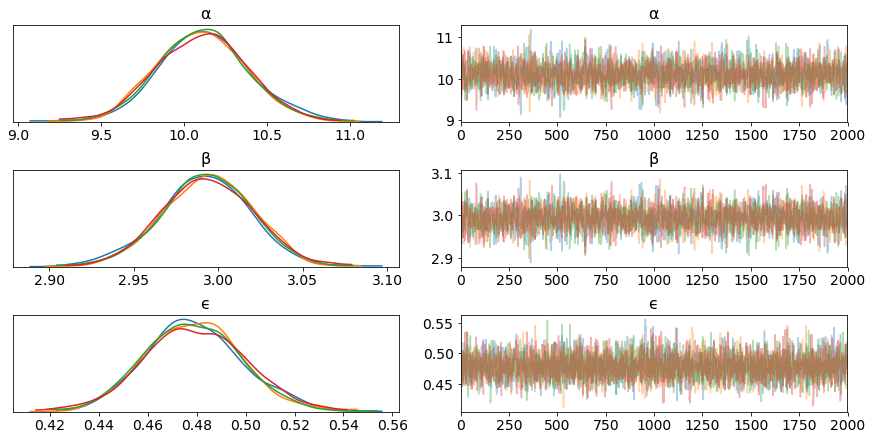

In [31]:
az.plot_trace(trace_g, var_names=['α', 'β', 'ϵ'])

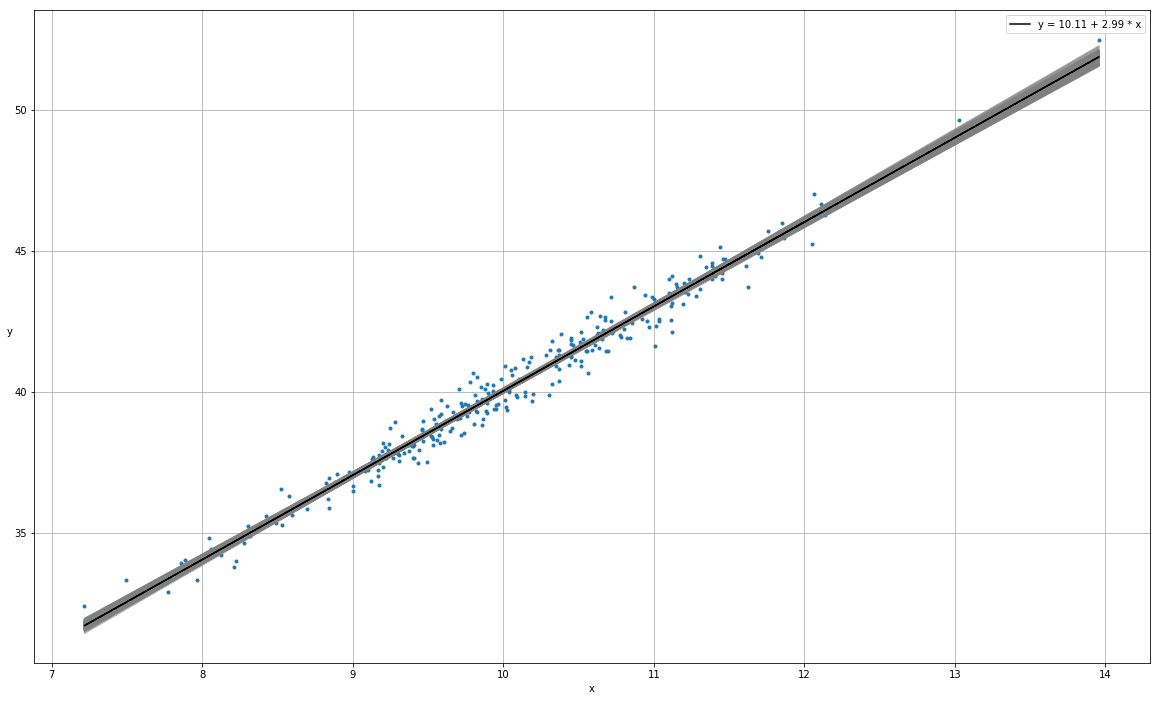

In [32]:
plt.figure(figsize=(20,12))
## Plot Data
plt.plot(x, y, 'C0.')

## Calculate Average
alpha_m = trace_g['α'].mean()
beta_m = trace_g['β'].mean()

## Samples from Posterior
draws = range(0, len(trace_g['α']), 10)

## Plot Samples
plt.plot(x, trace_g['α'][draws] + trace_g['β'][draws] * x[:, np.newaxis], c='gray', alpha=0.5)

## Plot Average
plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

## Draw 
#sig = az.plot_hpd(x, trace_g['μ'], credible_interval=0.98, color='blue')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()
plt.grid()

In [33]:
def get_preds(x):
    x_shared.set_value([x])
    ppc = pm.sample_ppc(trace_g, model=model_g, samples=100)
    y_ppc = ppc['y_pred']
    mean = y_ppc.mean()
    var = y_ppc.var()
    hpd = pm.stats.hpd(y_ppc)
    return mean, var, hpd

In [42]:
x_test = [0.1, 5, 15, 20, 50, 300]
for point in x_test:
    m, v, h = get_preds(point)
    print("Point: {}".format(point))
    print("- Mean(Prediction):  {:.2f}".format(m))
    print("- Var (Uncertainty): {:.2f}".format(v))
    print("- HPD:               [{:.4f} - {:.4f}]".format(h[0],h[1]))
    print("---")

  0%|          | 0/100 [00:00<?, ?it/s]

Point: 0.1
- Mean(Prediction):  10.40
- Var (Uncertainty): 0.26
- HPD:               [9.3911 - 11.2973]
---
Point: 5
- Mean(Prediction):  25.02
- Var (Uncertainty): 0.25
- HPD:               [24.1252 - 26.0975]
---
Point: 15
- Mean(Prediction):  54.95
- Var (Uncertainty): 0.19
- HPD:               [54.1579 - 55.7682]
---
Point: 20
- Mean(Prediction):  70.04
- Var (Uncertainty): 0.27
- HPD:               [68.9173 - 71.0073]
---


100%|██████████| 100/100 [00:00<00:00, 1515.59it/s]

Point: 50
- Mean(Prediction):  159.82
- Var (Uncertainty): 1.61
- HPD:               [157.3821 - 162.3390]
---
Point: 300
- Mean(Prediction):  906.59
- Var (Uncertainty): 47.75
- HPD:               [894.5559 - 923.0606]
---


## Sources <a class="anchor" id="sources"></a>

1. [Michael Betancourt - Probabilistic Modeling and Statistical Inference](https://betanalpha.github.io/assets/case_studies/modeling_and_inference.html)  
2. [Michael Betancourt - Probabilistic Building Blocks](https://betanalpha.github.io/assets/case_studies/probability_densities.html)  
3. [Michael Betancourt - Markov Chain Monte Carlo in Practice](https://betanalpha.github.io/assets/case_studies/markov_chain_monte_carlo.html)  
4. [Aerin Kim - Bayesian Inference — Intuition and Example](https://towardsdatascience.com/bayesian-inference-intuition-and-example-148fd8fb95d6)
5. [AllenDowney - ThinkBayes2](https://github.com/AllenDowney/ThinkBayes2)
6. [Andrew Gelman - Bayesian Data Analysis](http://www.stat.columbia.edu/~gelman/book/)  
7. [Colin Carroll - imcmc](https://github.com/ColCarroll/imcmc)
8. [Andrieu, Freitas - An Introduction to MCMC for Machine Learning](https://www.cs.ubc.ca/~arnaud/andrieu_defreitas_doucet_jordan_intromontecarlomachinelearning.pdf)  
9. [Eric Ma - An Introduction to Probability and Computational Bayesian Statistics](https://ericmjl.github.io/essays-on-data-science/machine-learning/computational-bayesian-stats/)  
10. [Agustinus Kristiadi's Blog - Rejection Sampling](https://wiseodd.github.io/techblog/2015/10/21/rejection-sampling/)  
11. [Thomas Wiecki - MCMC sampling for dummies](https://twiecki.io/blog/2015/11/10/mcmc-sampling/)  
12. [Chi Feng - MCMC Galery](https://chi-feng.github.io/mcmc-demo/app.html)  
13. [Iain Murray - Introduction to MCMC for Deep Learning](https://www.youtube.com/watch?v=Em6mQQy4wYA&t=1974s)  
14. [Michael Betancourt - A Conceptual Introduction to Hamiltonian Monte Carlo](https://arxiv.org/abs/1701.02434) 

## Nando MCMC Videos
- Video 1: https://youtu.be/TNZk8lo4e-Q
- Video 2: https://youtu.be/sK3cg15g8FI